## Linear, Quadratic, and Regularized Discriminant Analysis

In [162]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


<img src='./imgs/exe21.png' style=''>

## Geeting and fast look to data

In [2]:

data = pd.read_csv('./data/phoneme.csv')

In [3]:
data.head()

,row.names,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,...,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
0,1,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,...,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh,train.dr1.mcpm0.sa1
1,2,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,...,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,iy,train.dr1.mcpm0.sa1
2,3,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,...,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,dcl,train.dr1.mcpm0.sa1
3,4,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,...,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,dcl,train.dr1.mcpm0.sa1
4,5,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,...,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,aa,train.dr1.mcpm0.sa1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Columns: 259 entries, row.names to speaker
dtypes: float64(256), int64(1), object(2)
memory usage: 8.9+ MB


## Preprocessing

In [103]:
X = data.drop(['row.names','g','speaker'], axis=1)
y = data['g']

In [173]:

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)


## LDA

In [105]:

lda = LDA(n_components=2)
xTrainLDA = lda.fit_transform(xTrain, yTrain)


In [150]:

xTrainLDA.shape


(3607, 2)

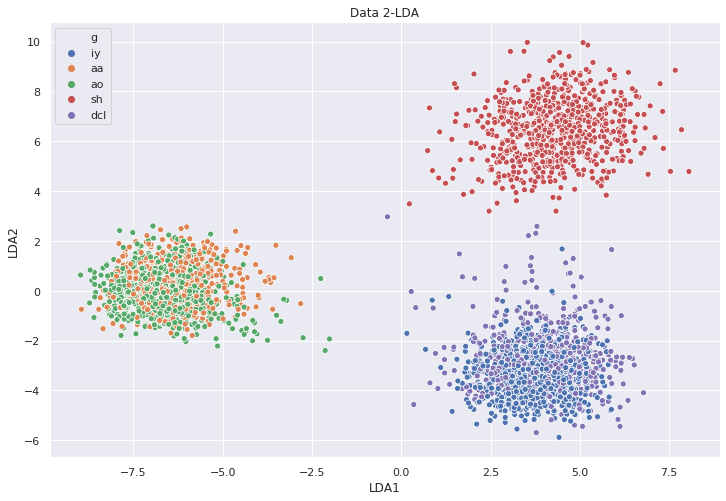

In [151]:

#Plotagem dados gerados ao aplicar LDA, n_componentes = 2, para os dados

sns.set()
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=xTrainLDA[:,0], y=xTrainLDA[:,1], hue=yTrain)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('Data 2-LDA')
plt.show()


Outro exemplo usando LDA com 4 componentes.

In [152]:

lda_n4 = LDA(n_components=4)
xTrain_n4 = lda_n4.fit_transform(xTrain, yTrain)


In [153]:

xTrain_n4DF = pd.DataFrame(xTrain_n4, columns=['LDA1','LDA2','LDA3','LDA4']); xTrain_n4DF

,LDA1,LDA2,LDA3,LDA4
0,2.706661,-2.805941,-3.068388,0.128472
1,-5.141227,1.139090,-1.603524,2.746525
2,2.053998,-3.860523,-3.318889,-0.812556
3,-6.182539,0.475996,0.018544,-1.800985
4,-6.961839,0.438542,-0.557952,1.197318
...,...,...,...,...
3602,3.752428,-2.472921,-2.377811,0.648665
3603,4.986695,-3.049921,4.679502,-0.812964
3604,-7.432627,0.498384,0.020643,-1.581352
3605,-6.671227,-0.606124,1.682682,-2.331413


In [154]:
newData = pd.concat([xTrain_n4DF, yTrain], axis=1, join='inner'); newData

,LDA1,LDA2,LDA3,LDA4,g
0,2.706661,-2.805941,-3.068388,0.128472,sh
1,-5.141227,1.139090,-1.603524,2.746525,iy
2,2.053998,-3.860523,-3.318889,-0.812556,dcl
3,-6.182539,0.475996,0.018544,-1.800985,dcl
4,-6.961839,0.438542,-0.557952,1.197318,aa
...,...,...,...,...,...
3602,3.752428,-2.472921,-2.377811,0.648665,aa
3603,4.986695,-3.049921,4.679502,-0.812964,sh
3604,-7.432627,0.498384,0.020643,-1.581352,aa
3605,-6.671227,-0.606124,1.682682,-2.331413,ao


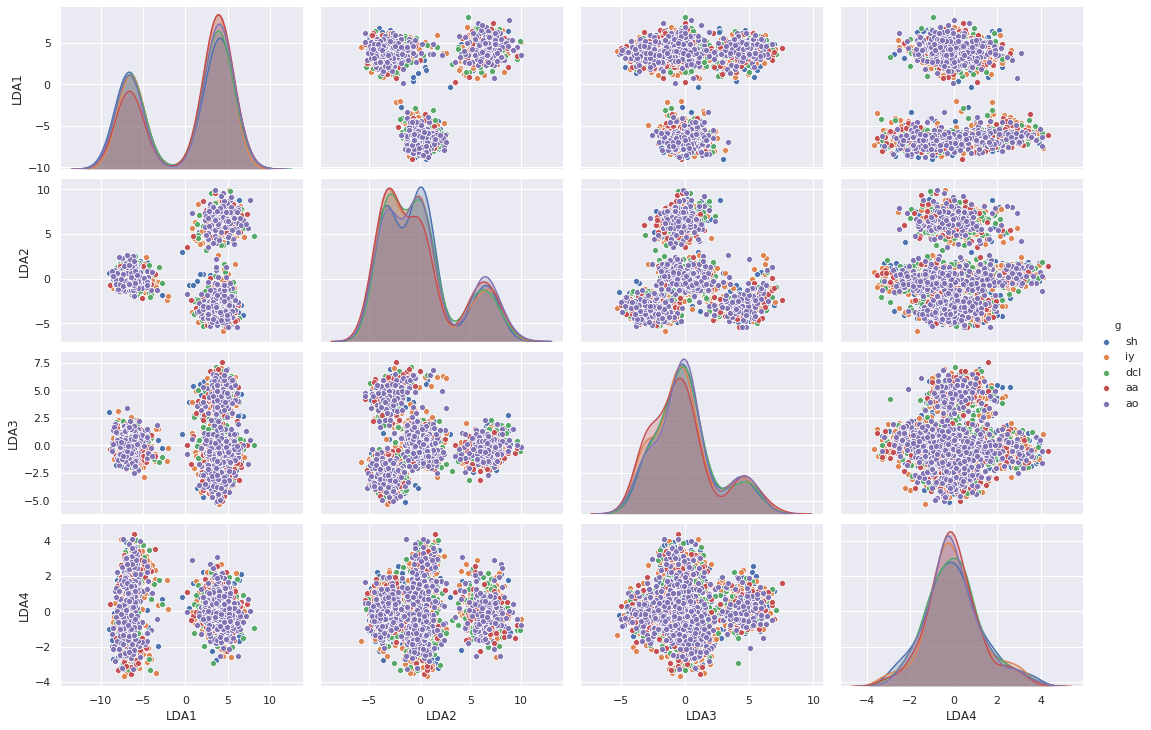

In [155]:

sns.pairplot(newData, hue='g', aspect=1.5)
plt.show()


## Using LDA to predict

In [176]:

lda = LDA(n_components=2)
lda.fit(xTrain, yTrain)
y_pred = lda.predict(xTest)


## Evaluating Performance

In [202]:

#data['g'].value_counts().index
#yTest.value_counts().keys()

In [200]:

confMatriz = confusion_matrix(yTest, y_pred, labels=yTest.value_counts().keys())
ac = accuracy_score(yTest, y_pred)



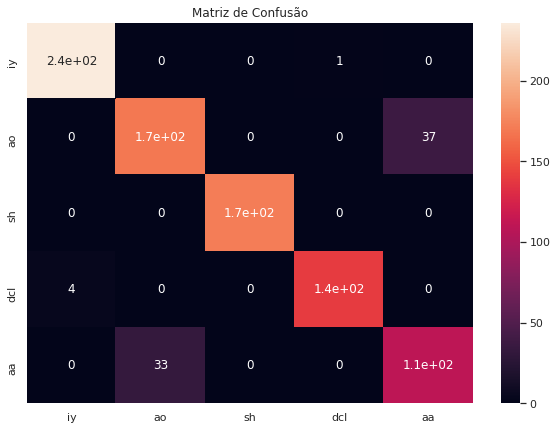

In [214]:

fig = plt.figure(figsize=(10,7))
sns.heatmap(confMatriz, annot=True, xticklabels=yTest.value_counts().keys(), yticklabels=yTest.value_counts().keys())
plt.title('Matriz de Confusão')
plt.show()


In [185]:

print('Accuracy: {0:.3f}'.format(ac))

Accuracy: 0.917


In [215]:
#help(train_test_split)
#help(LDA)
#help(confusion_matrix)

## Reference

[1]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/LivroDeExerciciosFECD.pdf
<br>
[2]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/FECD.pdf
<br>
[3]https://www.datascienceblog.net/post/machine-learning/linear-discriminant-analysis/
<br>
[4]https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/
<br>